<h1 align=center><font size=5>Statistical functions and Statistical Distributions</font></h1>

## Table of contents

- [Statistical functions](#stats_func)
    - [Averages and measures of central location](#avg_measure)
    - [Measures of Spread](#spread_measure)
- [Statistical distributions](#stats_dist)
    - [Discrete distributions](#disc_dist)
    - [Continuous distributions](#cont_dist)
- [Law of Large Numbers](#lln)
- [Central Limit Theorem](#clt)

## Statistical functions <a id = 'stats_func'></a>

### Averages and measures of central location <a id = 'avg_measure'></a>

#### Mean

The mean is the sum of all values divided by the number of values.

In [0]:
import statistics as st

x = [4,5,1,2,7,2,6,9,3,7,2]

print('Mean:', st.mean(x))

Mean: 4.363636363636363


&#x270d; Implement mean from scratch.

In [0]:
def mymean(ls):
  return sum(ls)/len(ls)

print('Mean:', mymean(x))

Mean: 4.363636363636363


#### Median 

The median is the middle value in the sorted list of numbers. 

In [0]:
print('Median:', st.median(x))

Median: 4


&#x270d; Implement median from scratch.

In [0]:
def mymedian(ls):
  ls.sort()
  print(ls)
  med = ls[int((len(ls)-1)/2)] if len(ls)%2!=0 else (ls[int(len(ls)/2)] + ls[int((len(ls)/2)-1)])/2
  return med

print("x : ", x)
print('Median:', mymedian(x))

x :  [1, 2, 2, 2, 3, 4, 5, 6, 7, 7, 9]
[1, 2, 2, 2, 3, 4, 5, 6, 7, 7, 9]
Median: 4


#### Mode 

The mode is the value that occurs most often. If no number in the list is repeated, then there is no mode for the list.

In [0]:
x = [1,2,3,3,5]
print(x)
print('Mode:', st.mode(x))

[1, 2, 3, 3, 5]
Mode: 3


&#x270d; Implement mode from scratch and test it.

In [0]:
def mymode(ls):
  mode = None
  max_occ=1
  for i in ls :
    if ls.count(i)>max_occ:
      max_occ=ls.count(i)
      mode = i
  return mode
  
print("x : ", x)
print('Mode:', mymode(x))
print('Mode:', mymode(list(range(1,10))))

x :  [1, 2, 2, 2, 3, 4, 5, 6, 7, 7, 9]
Mode: 2
Mode: None


### Measures of Spread <a id ='spread_measure'></a>

#### Range 

Range is the differene between the largest data value and the smallest data value in the set.

In [0]:
import numpy as np

x = [1, 4, 8]
print(x)
print('Range:', np.ptp(x))

[1, 4, 8]
Range: 7


&#x270d; Implement range from scratch.

In [0]:
def myrange(ls):
  return ls[-1] - ls[0]
  
print("x : ", x)
print('Range:', myrange(x))
print('Range:', myrange(list(range(9,54))))

x :  [1, 4, 8]
Range: 7
Range: 44


#### Interquartile Range (IQR)

The interquartile range (IQR), also called midspread, is the length of the middle 50% of data interval. The IQR is calculated as the difference between the third or upper quartile ($Q_3$) and the first or lower quartile ($Q_1$).

In [0]:
from scipy.stats import iqr

#x = [4,5,1,2,7,2,6,9,3,7,2]
x = [1, 4, 5, 6, 6, 7, 11, 12, 15, 17]

print('IQR of data:', iqr(x))

IQR of data: 6.5


In [0]:
q3, q1 = np.percentile(x, [75 , 25])
print('IQR of data:', q3 - q1)

IQR of data: 6.5


In [0]:
print(q1,q3)

5.25 11.75


&#x270d; Implement IQR from scratch.

In [0]:
import math 

def percentile(N, percent, key=lambda x:x):
    if not N:
        return None
    k = (len(N)-1) * percent
    f = math.floor(k)
    c = math.ceil(k)
    if f == c:
        return key(N[int(k)])
    d0 = key(N[int(f)]) * (c-k)
    d1 = key(N[int(c)]) * (k-f)
    return d0+d1

def myiqr(ls):
  print(ls)
  """
  q3 = ls[int(math.ceil((len(ls)-1)*0.75))]
  q1 = ls[int(math.floor((len(ls)-1)*0.25))]
  print("Percentiles of data :", q3, "and", q1)
  """
  q3 = percentile(ls, 0.75)
  q1 = percentile(ls, 0.25)
  return q3 - q1

print('IQR:', myiqr(x))
print('IQR:', myiqr(list(range(10))))

[1, 4, 5, 6, 6, 7, 11, 12, 15, 17]
IQR: 6.5
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
IQR: 4.5


#### Variance

Variance is the expectation of the squared deviation of a random variable from its mean. Informally, it measures how far a set of (random) numbers are spread out from their average value.

In [0]:
print(x)
print('Population variance:', st.pvariance(x))

print('Sample variance:', st.variance(x))

[1, 4, 5, 6, 6, 7, 11, 12, 15, 17]
Population variance: 23.64
Sample variance: 26.266666666666666


&#x270d; Implement population variance from scratch.

In [0]:
def myvariance(ls):
  print(ls)
  return mymean([i**2 for i in ls]) - mymean(ls)**2

print('Variance:', myvariance(x))
print('Variance:', myvariance(list(range(10))))

[1, 4, 5, 6, 6, 7, 11, 12, 15, 17]
Variance: 23.64
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
Variance: 8.25


#### Standard Deviation

The standard deviation is the square root of its variance.

In [0]:
print('Population standard deviation:', st.pstdev(x))

print('Sample standard deviation:', st.stdev(x))

Population standard deviation: 4.862098312457287
Sample standard deviation: 5.125101625008686


In [0]:
print('Population standard deviation:',np.std(x, ddof=0)) # ddof: deduct degrees of freedom

print('Sample standard deviation:', np.std(x, ddof=1))

Population standard deviation: 4.862098312457287
Sample standard deviation: 5.125101625008686


&#x270d; Implement population standard deviation from scratch.

In [0]:
def myst(ls):
  return math.sqrt(myvariance(ls))

print('Standard Deviation:', myst(x))
print('Standard Deviation:', myst(list(range(10))))

[1, 4, 5, 6, 6, 7, 11, 12, 15, 17]
Standard Deviation: 4.862098312457287
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
Standard Deviation: 2.8722813232690143


#### Skewness

Skewness [[Ref]](https://www.itl.nist.gov/div898/handbook/eda/section3/eda35b.htm) is a measure of symmetry, or more precisely, the lack of symmetry. A distribution, or data set, is symmetric if it looks the same to the left and right of the center point. 
- The skewness for a normal distribution is zero, and any symmetric data should have a skewness near zero. 
- Negative values for the skewness indicate data that are skewed left and positive values for the skewness indicate data that are skewed right. By skewed left, we mean that the left tail is long relative to the right tail. 
- Similarly, skewed right means that the right tail is long relative to the left tail. 
- If the data are multi-modal, then this may affect the sign of the skewness.

In [0]:
from scipy.stats import skew

np.random.seed(42)
data = np.random.normal(0, 1, 1000000)
data1 = np.random.uniform(0, 1, 100000)

print("skewness:",skew(data))
print("skewness:",skew(data1))

skewness: -0.0013503465339434091
skewness: -0.001029609965016787


&#x270d; Implement skewness from scratch.

In [0]:
def myskew(ls):
  return (mymean([i**3 for i in ls]) - 3*mymean(ls)*(myst(ls)**2) - mymean(ls)**3)/ (myst(ls)**3) 

x = [1, 4, 5, 6, 6, 7, 11, 12, 15, 17]
print('Skewness:', myskew(x))
print('Skewness:', myskew([1,2,3,4,5,4,3,2,1]))
print('Skewness:', myskew(data))
print('Skewness:', myskew(data1))
print('Skewness:', myskew(list(range(10))))

[1, 4, 5, 6, 6, 7, 11, 12, 15, 17]
[1, 4, 5, 6, 6, 7, 11, 12, 15, 17]
Skewness: 0.3720897726815459
[1, 2, 3, 4, 5, 4, 3, 2, 1]
[1, 2, 3, 4, 5, 4, 3, 2, 1]
Skewness: 0.1207363221040762
[ 0.49671415 -0.1382643   0.64768854 ... -0.11297975  1.46914237
  0.47643025]
[ 0.49671415 -0.1382643   0.64768854 ... -0.11297975  1.46914237
  0.47643025]
Skewness: -0.0013503465339432213
[0.21146625 0.90172608 0.56039432 ... 0.75585856 0.4174259  0.09373633]
[0.21146625 0.90172608 0.56039432 ... 0.75585856 0.4174259  0.09373633]
Skewness: -0.0010296099650618728
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
Skewness: 0.0


#### Kurtosis

Kurtosis is a measure of whether the data are heavy-tailed or light-tailed relative to a normal distribution. That is, data sets with high kurtosis tend to have heavy tails, or outliers. Data sets with low kurtosis tend to have light tails, or lack of outliers. A uniform distribution would be the extreme case.

In [0]:
from scipy.stats import kurtosis

print("kurtosis:", kurtosis(data))

kurtosis: -1.2033413113254254


## Statistical distributions <a id = 'stats_dist'></a>

### Discrete distributions <a id = 'disc_dist'></a>

#### Discrete uniform distribution

The discrete uniform distribution is a symmetric probability distribution whereby a finite number of values are equally likely to be observed. Its probability mass function is
$$
p(x) = \frac{1}{b - a}
$$
for $x = a, ..., b - 1$.

Python syntax:
> scipy.stats.randint(low, high+1)

> np.random.randint(low, high+1)

In [0]:
from scipy.stats import randint

low = 3
high = 8
X = randint(low, high + 1) # Declare X to be a uniform random variable
X.rvs(size= 10) # Get 10 random samples form X

array([5, 5, 5, 7, 7, 5, 3, 7, 5, 5])

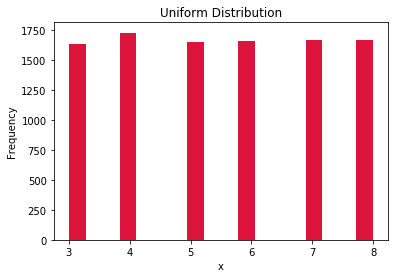

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

def plot_dist(X, title):
    ax = sns.distplot(X, kde=False, color='crimson', hist_kws={"linewidth": 15,'alpha':1})
    ax.set(xlabel= 'x', ylabel='Frequency', title = title);

X = randint.rvs(low, high + 1, size= 10000)
plot_dist(X, 'Uniform Distribution')

#### Bernoulli distribution

A Bernoulli trial is an experiment that has two outcomes that can be encoded as success ($x = 1$) or failure ($x = 0$). The Bernoulli Probability Mass Function (PMF) is
$$
p(x) = {p^x}{(1 - p)^{(1-x)}}
$$
where $x \in \{0, 1\}$.

Python syntax:
> scipy.stats.bernoulli(theta)

> np.random.choice([0, 1], p=[1-theta, theta])

In [0]:
from scipy.stats import bernoulli

p = 0.25         # probability of success
X = bernoulli(p) # Declare X to be a bernoulli random variable
X.rvs(10)        # Get 10 random samples form X

array([0, 0, 1, 1, 0, 0, 1, 0, 0, 0])

In [0]:
print('P(X = 0) =', X.pmf(0))
print('P(X = 1) =', X.pmf(1))
print('P(X <= 0.5) =', X.cdf(0.5)) # P(X<= 0.5) = P(X = 0) = .75
print('E[X] =', X.mean())
print('Var(X) =', X.var())
print('Std(X) =', X.std())

P(X = 0) = 0.75
P(X = 1) = 0.25
P(X <= 0.5) = 0.75
E[X] = 0.25
Var(X) = 0.1875
Std(X) = 0.4330127018922193


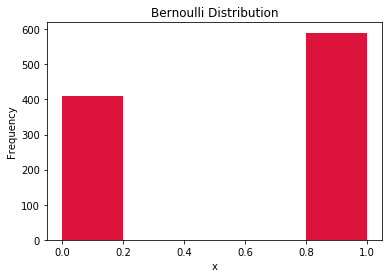

In [0]:
import seaborn as sns

X = bernoulli.rvs(p= 0.6, size= 1000)

plot_dist(X, 'Bernoulli Distribution')

#### Binomial Distribution

The binomial distribution is used to obtain the probability of observing $x$ successes in $n$ trials, with the probability of success on a single trial denoted by $p$. The binomial distribution assumes that $p$ is fixed for all trials. The formula for the binomial probability mass function is
$$
p(x) = {n\choose x} {p^x}{(1 - p)^{(n-x)}}
$$
where $x \in \{0, 1,..., n\}$, and ${n\choose x}$ is the binomial coefficient that calculates different ways of distributing $x$ successes in a sequence of $n$ trials. 

Python syntax:
> scipy.stats.binom(N, theta)

> np.random.binomial(N, theta)

In [0]:
from scipy.stats import binom

n = 7    # Number of trials (number of coins)
p = 0.5  # Probability of success in each trial 
sample_size = 5 # Sample size (number of experiments)

X = binom.rvs(n = n, p = p, size = sample_size)
X

array([1, 4, 2, 4, 4])

In [0]:
x = 2 # Number of successes sought
X = binom(n = n, p = p)
             
print('P(X = %d) = %f' %(x, X.pmf(x)))
print('P(X <= %d) = %f' % (x, X.cdf(x)))
print('E[X] =', X.mean())
print('Var(X) =', X.var())
print('Std(X) =', X.std())

P(X = 2) = 0.164063
P(X <= 2) = 0.226562
E[X] = 3.5
Var(X) = 1.75
Std(X) = 1.3228756555322954


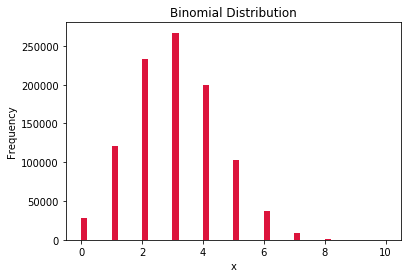

In [0]:
X = binom.rvs(n = 10, p = 0.3, size= int(1e6))

plot_dist(X, 'Binomial Distribution')

#### Geometric distribution

We perform a series of Bernoulli trials with probability of success $p$ until we get a success. 
The probability that the $x$-th trial (out of $x$ trials) is the first success is
$$
p(x) = {(1 - p)^{(x-1)}}{p}
$$
where $x \ge 1$.

Python syntax:
> scipy.stats.geom(theta)

> np.random.geometric(theta)

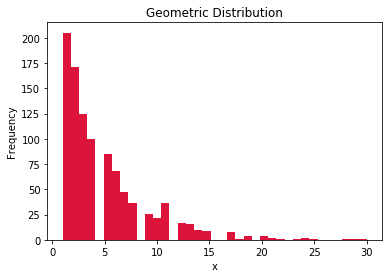

In [0]:
from scipy.stats import geom

p = 0.2 # probability of success on each trial
X = geom.rvs(p, size= 1000)

plot_dist(X, 'Geometric Distribution')

#### Poisson distribution

The Poisson distribution is a discrete probability distribution that expresses the probability of a given number of events occurring in a fixed interval of time or space if these events occur with a known constant rate and independently of the time since the last event. The Poisson probability that exactly $x$ successes occur in an interval, with the mean number of successes $\lambda$, is
$$
p(x) = exp(-\lambda)\frac{{{\lambda}^x}}{{x!}}
$$
where $x \ge 1$.

Python syntax:
> scipy.stats.poisson(lam)

> np.random.poisson(lam)

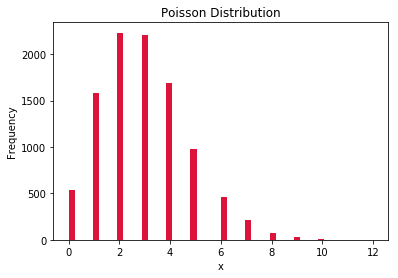

In [0]:
from scipy.stats import poisson

lam = 3 # average number of events per interval
X = poisson.rvs(lam, size= 10000)

plot_dist(X, 'Poisson Distribution')

### Continuous distributions <a id = 'cont_dist'></a>

#### Uniform distribution

Any outcome in a given range has equal probability.

Python syntax:
> scipy.stats.uniform(low, high)

> np.random.uniform(low, high)

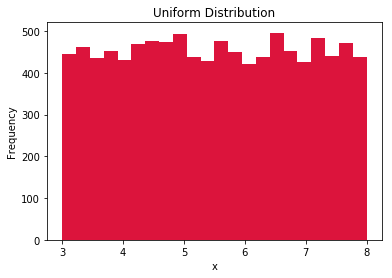

In [0]:
from scipy.stats import uniform

low = 3
high = 8
X = uniform.rvs(low, high - low, size= 10000)

plot_dist(X, 'Uniform Distribution')

#### Normal Distribution

The probability density of the normal (Gaussian) distribution is
$$
f(x) = \frac{1}{\sqrt{2\pi{{\sigma}^2}}} exp(- \frac{(x - \mu)^2}{2{\sigma}^2})
$$
where $\mu$ is the mean, and ${\sigma}^2$ is the variance.

Python syntax:
> scipy.stats.norm(mu, sigma)

> np.random.normal(mu, sigma)

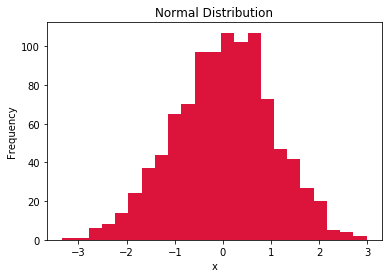

In [0]:
from scipy.stats import norm

X = norm.rvs(loc=0, scale=1, size=1000)

plot_dist(X, 'Normal Distribution')

#### Student's t distribution

The Student's t-distribution (or simply the t-distribution) is given by
$$
f(x) = \frac{\Gamma(\frac{v+1}{2})}{\sqrt{\pi v} \Gamma(v)} (1 + \frac{x^2}{v})^{-\frac{v+1}{2}}
$$
where $x$ is a real number, $ν > 0$ is the degrees of freedom parameter, and $\Gamma$ is the gamma function.

Python syntax:
> scipy.stats.t(nu, mu, sigma)

> mu + sigma * np.random.standard_t(nu)

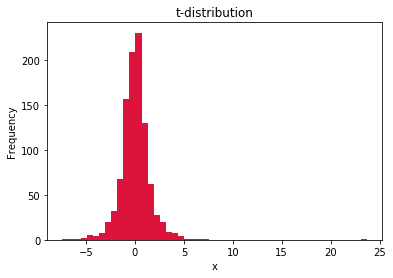

In [0]:
from scipy.stats import t

df = 3

X = t.rvs(df, size=1000)

plot_dist(X, 't-distribution')

#### Chi-square distribution

The chi-square distribution with $k$ degrees of freedom is the distribution of a sum of the squares of $k$ independent standard normal random variables. Its PDF is
$$
f = \frac{1}{2^{\frac{k}{2}} \Gamma(\frac{k}{2})} x^{\frac{k}{2} - 1} exp(-\frac{x}{2})
$$
where $x>0$ and $k>0$.

Python syntax:
> scipy.stats.chi2(nu)

> np.random.chisquare(nu)

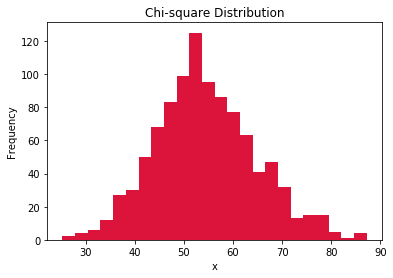

In [0]:
from scipy.stats import chi2

df = 55
X = chi2.rvs(df, size=1000)

plot_dist(X, 'Chi-square Distribution')

#### Exponential distribution

The exponential distribution is the probability distribution of the time between events in a Poisson process. The PDF of an exponential distribution is
$$
f = \lambda exp(-\lambda x)
$$
where $x \ge 0$ and $\lambda > 0$ is the parameter of the distribution, often called the rate parameter.

Python syntax:
> scipy.stats.expon(loc=0, scale=1/lambda)

> np.random.exponential(1/lambda)

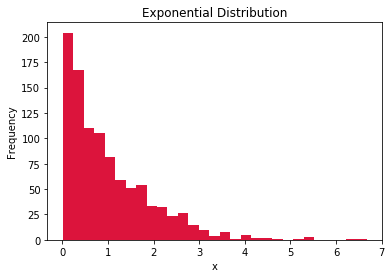

In [0]:
from scipy.stats import expon

X = expon.rvs(loc=0, scale=1, size=1000)

plot_dist(X, 'Exponential Distribution')

## Law of Large Numbers <a id = 'lln'></a>

The law of large numbers (LLN) states that, the average of the results obtained from a large number of trials should be close to the expected value, and will tend to become closer as more trials are performed.

Let $\{X_1, X_2, ..., X_n\}$ be a random sample of size $n$ drawn iid from a distribution with mean $\mu$. According to LLN, we have

$$\bar{X} = \frac{X_1 + X_2 + ...+ X_n}{n} \to \mu$$
for large $n$.


For example, a single roll of a fair, six-sided dice produces one of the numbers 1, 2, 3, 4, 5, or 6, each with equal probability. Therefore, the expected value of the average of the rolls is:
$$\frac{1+2+3+4+5+6}{6}=3.5$$
According to the law of large numbers, if a large number of six-sided dice are rolled, the average of their values (the sample mean) is likely to be close to 3.5 (the population mean), with the precision increasing as more dice are rolled [[Ref](https://en.wikipedia.org/wiki/Law_of_large_numbers)]. In the following, we have an illustration of the law of large numbers using a particular run of rolls of a single dice. 

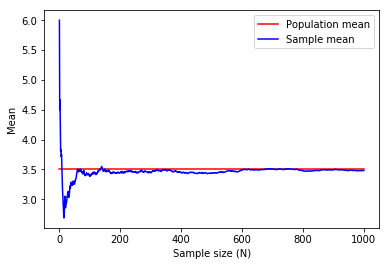

In [0]:
np.random.seed(123)

N = 1000 # sample size

rolls = np.random.randint(1, 7, N)

sample_means = []
for i in range(N):
    sample_means.append(rolls[:i + 1].mean())
    
plt.plot(range(1, N+1), 3.5*np.ones(N), 'r', label = 'Population mean')
plt.plot(range(1, N+1), sample_means, 'b', label = 'Sample mean')
plt.xlabel('Sample size (N)')
plt.ylabel("Mean")
plt.legend()
plt.show() 

&#x270d; Illustrate LLN for samples drawn iid from a normal distribution with mean of 50 and a standard deviation of 10.

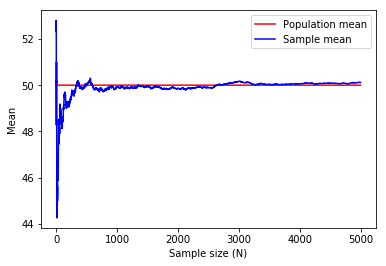

In [0]:
N = 5000 # sample size

normdist = norm.rvs(loc=50, scale=10, size=N)

sample_means = []
for i in range(N):
    sample_means.append(normdist[:i + 1].mean())

#plot_dist(normdist, 'Normal Distribution')
plt.plot(range(1, N+1), 50*np.ones(N), 'r', label = 'Population mean')
plt.plot(range(1, N+1), sample_means, 'b', label = 'Sample mean')
plt.xlabel('Sample size (N)')
plt.ylabel("Mean")
plt.legend()
plt.show() 

## Central Limit Theorem <a id = 'clt'></a>

The central limit theorem (CLT) dictates that the distribution of sample means (calculated across different random samples from our overall population) will be normally distributed. Mathematically, let $\{X_1, X_2, ..., X_n\}$ be a random sample of size $n$ drawn iid from a distribution with mean $\mu$ and variance ${\sigma}^2$, and define the sample average of the random variables as
$$
\bar{X} = \frac{X_1 + X_2 + ... + X_n}{n}
$$
The CLT states that
$$
\bar{X} \sim N(\mu, \frac{{\sigma}^2}{n})
$$
for large $n$. 

&#x270d; Test CLT for iid Gamma random variables using scipy.

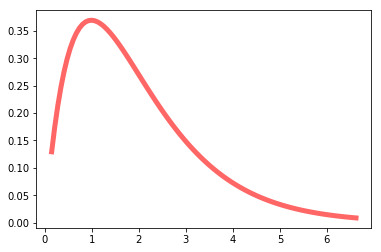

In [0]:
from scipy.stats import gamma

fig, ax = plt.subplots(1, 1)
a = 1.99
mean, var, skew, kurt = gamma.stats(a, moments='mvsk')
x = np.linspace(gamma.ppf(0.01, a), gamma.ppf(0.99, a), 100)
ax.plot(x, gamma.pdf(x, a),'r-', lw=5, alpha=0.6, label='gamma pdf')

&#x270d; Test CLT for iid uniform random variables in range of [5, 10] using numpy.